In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
def create_tree(m, h):
    """
    Return tree graph

    Args:
        m: number of children per node
        h: height of tree

    Returns:
        A networkx graph of a full m-ary tree with height h
    """
    fig, ax = plt.subplots(figsize=(20,8))
    network = nx.Graph() # Creating the graph and adding nodes
    T = nx.generators.balanced_tree(m, h)
    return T

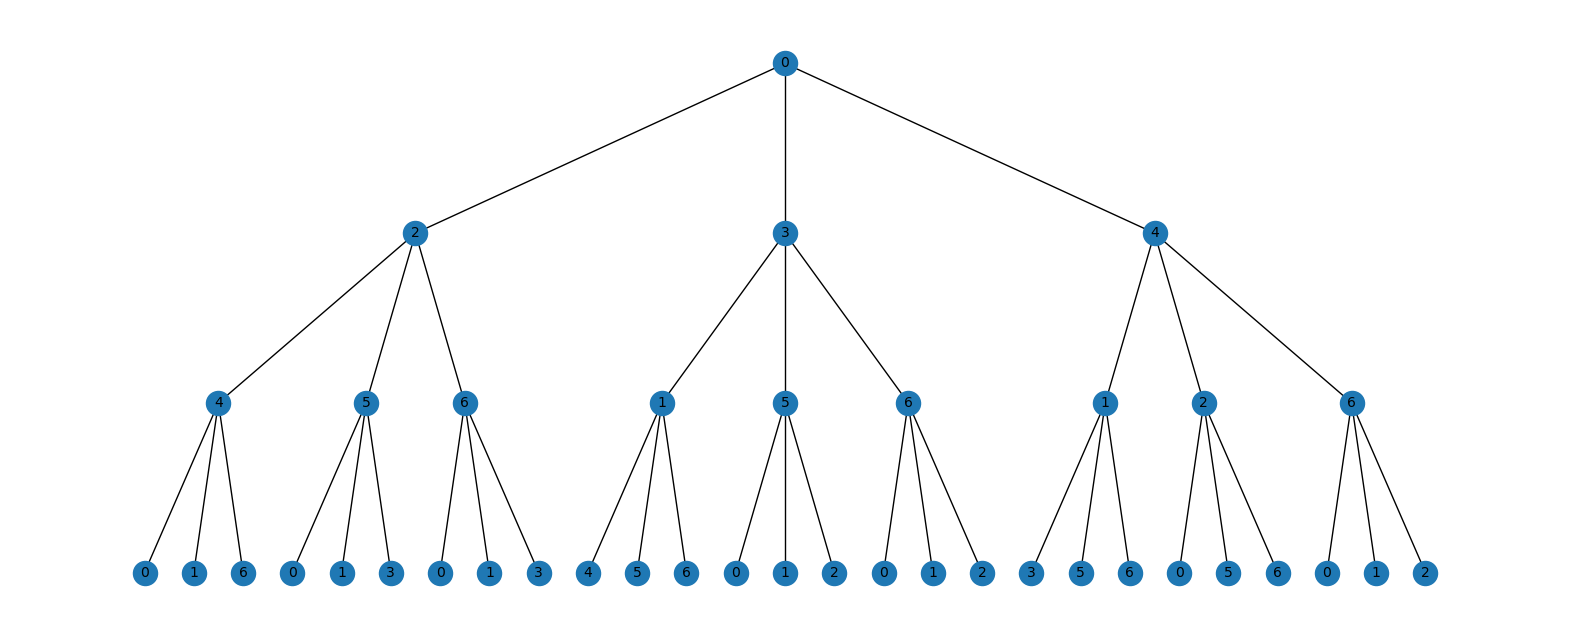

[0, 2, 3, 4, 4, 5, 6, 1, 5, 6, 1, 2, 6, 0, 1, 6, 0, 1, 3, 0, 1, 3, 4, 5, 6, 0, 1, 2, 0, 1, 2, 3, 5, 6, 0, 5, 6, 0, 1, 2]
The span is: 7


In [5]:
tree = create_tree(3,3)
node_list = list(nx.nodes(tree))
# Creates a dictionary with the keys being the nodes number and the value the frequency assigned to the node
label_list = dict.fromkeys(node_list)

for i in node_list: # Iterate through each node in the in the graph
    neighbors_list = list(nx.all_neighbors(tree, i)) # Find all the neighbors to the node
    bad_list=[] # Initialize list of frequency the node can not be
    for k in neighbors_list: #Iterates through the adjacent nodes
        if label_list[k] is not None: # If the adjacent nodes are assigned a frequency add frequencies to bad frequencies
            bad_list.append(label_list[k]) # The original node cannot be the same as the adjunct
            bad_list.append(label_list[k]+1) # The original node cannot be one frequency away above from the adjacent nodes frequency
            bad_list.append(label_list[k]-1) # The original node cannot be one frequency away below from the adjacent nodes frequency
        secondary_neighbor = list(nx.all_neighbors(tree, k)) # List of nodes that are adjacent to the adjacent node
        for j in secondary_neighbor: # Iterate through adjacent to adjacent nodes
            if label_list[j] is not None: #If the adjacent to adjacent node exists add it to the bad frequencies
                bad_list.append(label_list[j])  # The original node cannot be the same as the adjacent to adjacent node
    if bad_list == []: # If there are no adjacent or adjacent to adjacent nodes set the frequency to 0
         label_list[i]=0 # Set the nodes frequency to 0
    else:
        possible_color=range(0,max(bad_list)+2) # List of possible frequencies to choose from, 0 to highest frequency plus 1
        label_list[i]= [x for x in possible_color if x not in bad_list][0] # Find the lowest possible frequency that is not in the bad list and can be used

network = nx.Graph()
pos = graphviz_layout(tree, prog="dot")
nx.draw_networkx_labels(network, pos, label_list, font_size=10)
nx.draw_networkx(tree, pos, with_labels=False)
plt.axis("off")
plt.show()

frequencies_list = list(label_list.values()) # list of the frequencies assigned to nodes
print(frequencies_list) # Print out list
 
span=max(frequencies_list)-min(frequencies_list)+1 #The span of frequencies used including 0
print("The span is:", span) # Print span
